# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm

%matplotlib inline

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({
    'X': [17,51,27,21,36,48,19,26,54,30], 
    'Y': [10,1,5,9,4,2,9,6,0,3]
})


Draw a dispersion diagram (scatter plot) for the data.

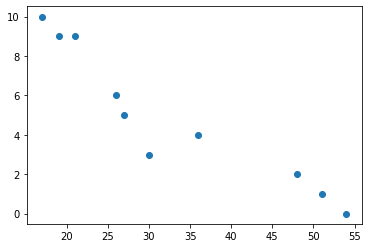

In [7]:
# Your code here.

plt.scatter(student_data['X'], student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Your response here. 
# This plot clearly trends negatively, meaning that as age increases tardines decreases

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [13]:
covar = np.cov(
    student_data['X'],
    student_data['Y']
)

print("Covariance:",round(covar[0][1],2))


corr = student_data['X'].corr(student_data['Y'])

print("Correlation Coefficient:",corr)

Covariance: -45.57
Correlation Coefficient: -0.9391626886887122


In [14]:
# Your response here.
#The covariance shows us that there is a negative relationship between these 2 varaibles
#The correlation coefficient shows us that this negative relationship is very strong

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [26]:
x_var = student_data['X']
y_var = student_data['Y']

slope, intercept, r_squared, p_value, std_err = linregress(
    x_var,
    y_var
)

slope, intercept, r_squared, p_value, std_err

print("Slope:",slope)
print("Intercept:",intercept)
print("R-Squared:",r_squared)
print("P-Value:", p_value)
print("Standard Error:", std_err)

Slope: -0.2428207709159808
Intercept: 12.888803363135768
R-Squared: -0.9391626886887121
P-Value: 5.56665383455343e-05
Standard Error: 0.03139728816158607


In [31]:
# Your response here.
# Intercept = 12.8888
# Using linear regression

Plot your regression model on your scatter plot.

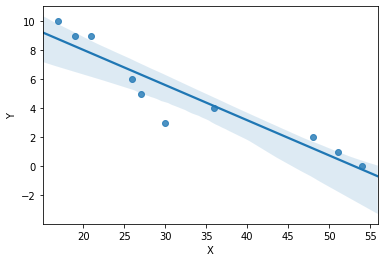

In [21]:
# Your code here.
sns.regplot(x = x_var, y = y_var, data = student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [28]:
# Your response here. 
# If the class is the entire population of interest, then I can confidently say that there is a negative 
# relationship between age and tardies. As age increases tardies decrease

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [30]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [35]:
vehicles.dtypes

multi = pd.DataFrame({
    'x1': vehicles['Year'],
    'x2': vehicles['Cylinders'],
    'x3': vehicles['Fuel Barrels/Year'],
    'x4': vehicles['Combined MPG'],
    'x5': vehicles['Fuel Cost/Year'],
    'y': vehicles['CO2 Emission Grams/Mile']
})

multi.head(1)

,x1,x2,x3,x4,x5,y
0,1984,4.0,19.388824,17,1950,522.764706


In [37]:
X = multi[['x1', 'x2','x3','x4','x5']]
y = multi['y']

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
regr.score(X, y) # R-squared

0.9808734920269122

In [44]:
print("Year correlation with emissions:",(np.corrcoef(multi['x1'],y))[0][1])
print("Cylinders correlation with emissions:",(np.corrcoef(multi['x2'],y))[0][1])
print("Fuel Barrels/Year correlation with emissions:",(np.corrcoef(multi['x3'],y))[0][1])
print("Combined MPG correlation with emissions:",(np.corrcoef(multi['x4'],y))[0][1])
print("Fuel Cost/Year correlation with emissions:",(np.corrcoef(multi['x5'],y))[0][1])


Year correlation with emissions: -0.2222996029505424
Cylinders correlation with emissions: 0.7523925537297491
Fuel Barrels/Year correlation with emissions: 0.9861886621428733
Combined MPG correlation with emissions: -0.9262290389336436
Fuel Cost/Year correlation with emissions: 0.9308651512201843


In [45]:
# Your response here. 

# Which variable do you think will be the most important in determining CO2 emissions? 
# Fuel Barrels/Year has the strongest correlation with emissions, followed by Fuel Cost/Year then Combined MPG

# Which provides the least amount of helpful information for determining CO2 emissions?
# Year seems to have the weakest correlation with emissions

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [52]:
# Your response here. 
# Using linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

intercept = regr.intercept_ #y-intercept

x1_slope, x2_slope, x3_slope, x4_slope, x5_slope = regr.coef_

regr.score(X, y) # R-squared

print("Intercept:", intercept)
print("Year Slope:", x1_slope)
print("Cylinders Slope:", x2_slope)
print("Fuel Barrels/Year Slope:", x3_slope)
print("Combined MPG Slope:", x4_slope)
print("Fuel Cost/Year Slope:", x5_slope)
print("R-sqaured", regr.score(X, y))

Intercept: 769.888283646565
Year Slope: -0.32061673151874504
Cylinders Slope: 1.8787997557940583
Fuel Barrels/Year Slope: 19.052925065031577
Combined MPG Slope: -3.0403993802127887
Fuel Cost/Year Slope: 0.032309478941384695
R-sqaured 0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [62]:
# Your response here. 

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.092e+06
Date:                Thu, 14 Nov 2019   Prob (F-statistic):                        0.00
Time:                        21:01:33   Log-Likelihood:                     -1.5250e+05
No. Observations:               35952   AIC:                                  3.050e+05
Df Residuals:                   35947   BIC:                                  3.050e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [58]:
# Your code here. 

party = pd.DataFrame({
    'num_people_inv' : [1,3,4,6,8,9,11,14],
    'num_people_att' : [1,2,4,4,5,7,8,13]
})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

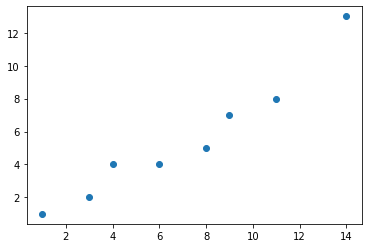

In [54]:
# Your code here.
plt.scatter(party['num_people_inv'], party['num_people_att'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [56]:
# Your response here. 
# The variables seem to have a possitive relationship, the more people I invite the more that show up

x_var = party['num_people_inv']
y_var = party['num_people_att']

slope, intercept, r_squared, p_value, std_err = linregress(
    x_var,
    y_var
)

print("Slope:",slope)
print("Intercept:",intercept)
print("R-Squared:",r_squared)
print("P-Value:", p_value)
print("Standard Error:", std_err)

Slope: 0.8484848484848485
Intercept: -0.43939393939393945
R-Squared: 0.9652303546573691
P-Value: 0.00010236374464090686
Standard Error: 0.09380896778286217


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Slope: 0.6842105263157895
Intercept: 0.32330827067669166
R-Squared: 0.971278116825086
P-Value: 0.0002644056885656864
Standard Error: 0.07496206665031292


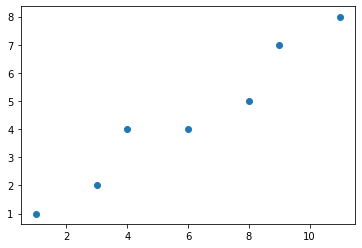

In [61]:
# Your response here. 
party = party.drop([7])

plt.scatter(party['num_people_inv'], party['num_people_att'])

x_var = party['num_people_inv']
y_var = party['num_people_att']

slope, intercept, r_squared, p_value, std_err = linregress(
    x_var,
    y_var
)

print("Slope:",slope)
print("Intercept:",intercept)
print("R-Squared:",r_squared)
print("P-Value:", p_value)
print("Standard Error:", std_err)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 